## Initialization

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import math

from utils import *

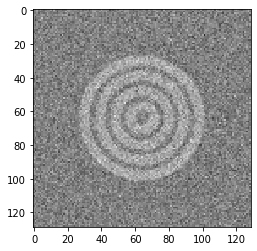

(129, 129, 3)


In [2]:
img = cv2.imread('images/CC.png')
plt.imshow(img)
plt.show()
print(img.shape)

Resize the image, to fit the 5x5 tiles perfectly

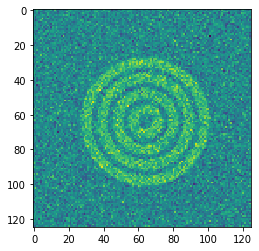

In [3]:
img = pre_process(img)
plt.imshow(img)

--------------------------------------------

In [7]:
def initialize_beam_curve(img):
    p1i = []
    p2i = []
    ri = []
    h,w = img.shape

    p1,p2 = tile_operations()
    i = 0
    while(i<h-4):
        j = 0
        row = []
        while(j<w-4):
            p1_temp = list(np.asarray(p1) + [i,j])
            p2_temp = list(np.asarray(p2) + [i,j])
            
            p1i.append(p1_temp)
            p2i.append(p2_temp)
            
            for k in range(len(p1_temp)):
                x1,y1 = p1_temp[k]
                x2,y2 = p2_temp[k]
                row.append(tileResponse(img,x1,y1,x2,y2))
            j += 5
            
        ri.append(row)
        i += 5

    return p1i, p2i, ri

xi are co-ordinates of p1 <br/>
yi are co-ordinates of p2 <br/>
ri is the response between p1 and p2

In [8]:
xi, yi, ri = initialize_beam_curve(img)

In [9]:
print("Number of tiles: ",len(xi))
print("Number of responses recorded: ",len(ri))
print("Number of responses recorded: ",len(ri[0]))

Number of tiles:  625
Number of responses recorded:  25
Number of responses recorded:  2100


### Bottom-up

Select two adjacent tiles

In [ ]:
X = []
Y = []
R = []
i = 0
while i <len(ri):
    j = 0
    while j <len(ri[0]):
        X.append(xi[i][j]) X.append(xi[i][j+1]) X.append(xi[i+1][j+1]) X.append(xi[i+1][j])
        Y.append(yi[i][j]) Y.append(yi[i][j+1]) Y.append(yi[i+1][j+1]) Y.append(yi[i+1][j])
        R.append(ri[i][j]) R.append(ri[i][j+1]) R.append(ri[i+1][j+1]) R.append(ri[i+1][j])
        
        helper(X,Y,R)
        
        j +=2
    i += 2  

In [ ]:
def helper

### top-down

In [10]:
def merge_squares(tl,tr,bl,br):
    n,n = tl.shape
    

In [9]:
def quad_pyramid_recursive(img):
    n,m = img.shape
    
    if n==5:
        xi, yi, ri = initialize_beam_curve(im)
    else:
        mid = math.ceil(n/2) 
        print(mid)
        c = [[0,0],[0,0]]
        
        c[0,0] = img[0:mid,0:mid]
        c[0,1] = img[0:mid,mid:n]
        c[1,0] = img[mid:n,0:mid]
        c[1,1] = img[mid:n,mid:n]
        
        for i in (1,2):
            for j in (1,2):
                quad_pyramid_recursive(img[i,j])
                
        merge_squares(c[0,0],c[0,1],c[1,0],c[1,1])
    
    return

In [15]:
k,l = quad_pyramid_recursive(img)